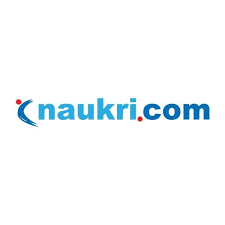


In this Notebook, we will see some basic univariate, bivariate and mainly on the various methods to handle categorical variables in a Machine learning Pipeline as the dataset seems to have only categorical data.

<div class="alert alert-block alert-warning">
    

   1. [Descriptive Statistics](#desc)
    
       1.1 [Univariate Analysis](#uva)
    
       1.2 [Bivariate Analysis](#biva)

  
   2. [Handling Categorical data](#hcd)
    
       2.1 [Replace values](#rv)
   
       2.2 [Label-encoding](#len)
    
       2.3 [One-hot encoding](#oh)
    
       2.4 [Binary Encoding](#bec)
    
       2.5 [Backward Differencing encoding](#bde)
    
    
   3. [NLP](#nl)
    
       3.1 [Basic Analysis+Ngram](#bg)
    
       3.2 [NER](#ner)
    
       3.3 [POS](#pos)
    
       3.4 [Text Readability](#tex)
    
    
   4. [Boosting Models](#bst)

In [ ]:
import numpy as np
import pandas as pd
import os

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df = pd.read_csv('../input/data-science-bowl-2019/train.csv')
test_df = pd.read_csv('../input/data-science-bowl-2019/test.csv')
train_labels_df = pd.read_csv('../input/data-science-bowl-2019/train_labels.csv')
specs_df = pd.read_csv('../input/data-science-bowl-2019/specs.csv')
sample_submission_df = pd.read_csv('../input/data-science-bowl-2019/sample_submission.csv')

data = pd.read_csv('/kaggle/input/jobs-on-naukricom/home/sdf/marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv')
data.head(5)

<div class="alert alert-block alert-warning">
    
Basically, the following data types can be used in base python:

    - boolean
    - integer
    - float
    - string
    - list
    - None
    - long
    - complex
    - object


Numerical or Quantitative
   
     - Discrete
        Integer (int)
     - Continuous
        Float (float)


Categorical or Qualitative
     - Nominal
            Boolean (bool)
            String (str)
            None (NoneType)
     - Ordinal
            Only defined by how you use the data
            Often important when creating visuals

In [ ]:
data.dtypes

<a id="desc"> </a>

### Univariate

uni- means one and bi- means two: think of a unicycle, which has one wheel, and a bicycle, which has two. Multi means many and in statistics it is often used to mean “more than two.”

Univariate statistics such as the mean therefore describe characteristics of one variable, and the bar chart and histogram are examples of univariate graphic displays.

Frequency Table - A type of Univariate analysis and a common way to summarize categorical data

#### Here lets look at Role Category

In [ ]:
rc = data['Role Category'].value_counts().reset_index()
rc.columns = ['Role Category', 'Count']
rc['Percent'] = rc['Count']/rc['Count'].sum() * 100
rc

#### I see a lot of 'sentences' mentioned as part of Role Category, which isnt ideal. 

#### Just checking the top 50 to see if they are proper, and they are but plotting the top ones

Bar Chart - A type of Univariate analysis and a common way to visualize categorical data

In the X-Axis is the name and Y-axis has the frequency AKA the count of the Role Category.

In [ ]:
rc = rc[:10]

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

rcParams['figure.figsize'] = 13, 10
ax = sns.barplot(x="Role Category", y="Count", data=rc)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

#### Sometimes, a pie chart could also help

In [ ]:
rc = data['Role Category'].value_counts().nlargest(n=10)

fig = px.pie(rc, 
       values = rc.values, 
       names = rc.index, 
       title="Top 10 Role Categories", 
       color=rc.values)
       
fig.update_traces(opacity=0.5,
                  marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_x=0.5)
fig.show()

#### What can be observed is, nearly 40% is programming & Design job roles in naukri.

#### Top Locations

In [ ]:
location = data['Location'].value_counts().nlargest(n=10)

fig = px.bar(y=location.values,
       x=location.index,
       orientation='v',
       color=location.index,
       text=location.values,
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=800, 
                  showlegend=False, 
                  xaxis_title="City",
                  yaxis_title="Count",
                  title="Top 10 cities by job count")
fig.show()

So, for categorical data;

- Frequency Tables - Great for Numerical Summaries
- Bar Charts -  Great for Visualization

#### QUANTITATIVE DATA - UNIVARIATE ANALYSIS

Variables that have a numerical value(Quantity) that we can perform mathematical operations on.

Divided into 2

- Discrete: Age, Number of Children in a room etc.. 
- Continuous: Height, Weight etc..


##### We dont have numerical variables here to plot, but ideal plots would be Histogram, boxplots.

<a id="biva"> </a>

### Bivariate


Two-way contingency table between Job Title and Job Experience required

In [ ]:
data1 = data[:10 ] ## taking just 10 records for demo

lis_sum_t = data1[['Job Title', 'Job Experience Required']]
two_cls = pd.crosstab(lis_sum_t['Job Title'], lis_sum_t['Job Experience Required'])

two_cls.plot.bar(stacked=True)
#plt.legend(title='mark')
plt.show()

<a id="hcd"> </a>

### Handling Categorical data


1. Drop them entirely(if they dont contain any useful info) - Cant be done here.


<a id="rv"> </a>

#### 2. Replacing values


#### For instance, Job Experience required contains a lot of values that can be cut short to just 3 or 4 for better feature engineering. Lets do that! (I am using only a subset of the data but the same can be done for the entire dataset)

In [ ]:
place_map = {'Location': {'Hyderabad': 1, 'Pune': 2, 'Bengaluru': 3, 'Mumbai': 4,
                                  'Gurgaon': 5, 'Pune,Pune': 6}}

In [ ]:
labels = data1['Location'].astype('category').cat.categories.tolist()

replace_map_comp = {'Location' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

In [ ]:
#data1.replace(replace_map_comp, inplace=True)
data1['Location']
data1['Location'].value_counts()

<a id="len"> </a>

#### 3. Label Encoding

![](https://i.imgur.com/tEogUAr.png)

Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

You can do label encoding via attributes .cat.codes on your DataFrame's column or through sklearns label encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

data2 = data[:10]

data2['l_code'] = lb_make.fit_transform(data1['Location'])

data2.head() #Results in appending a new column to df

Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm. Should the location Hyderabad be given more weight than others?

To solve this issue there is another popular way to encode the categories via something called one-hot encoding.


<a id="oh"> </a>

#### 4. One-Hot encoding


![](https://i.imgur.com/TW5m0aJ.png)

The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

There are many libraries out there that support one-hot encoding but the simplest one is using pandas' .get_dummies() method.

This function is named this way because it creates dummy/indicator variables (1 or 0). There are mainly three arguments important here, the first one is the DataFrame you want to encode on, second being the columns argument which lets you specify the columns you want to do encoding on, and third, the prefix argument which lets you specify the prefix for the new columns that will be created after encoding.

In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

lb_results = lb.fit_transform(data2['Location'])

lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())

Note that this lb_results_df resulted in a new DataFrame with only the one hot encodings for the feature carrier. This needs to be concatenated back with the original DataFrame, which can be done via pandas' .concat() method. The axis argument is set to 1 as you want to merge on columns.

In [ ]:
result_df = pd.concat([data2, lb_results_df], axis=1)

result_df.head(2)

<a id="bec"> </a>

#### 5. Binary Encoding

In this technique, first the categories are encoded as ordinal, then those integers are converted into binary code, then the digits from that binary string are split into separate columns. 

This encodes the data in fewer dimensions than one-hot.

You can do binary encoding via a number of ways but the simplest one is using the category_encoders library. You can install category_encoders via pip install category_encoders (shown below)

You have to first import the category_encoders library after installing it. Invoke the BinaryEncoder function by specifying the columns you want to encode and then call the .fit_transform() method on it with the DataFrame as the argument.

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Location'])
df_binary = encoder.fit_transform(data2)
df_binary.head()

Notice that four new columns are created in place of the Location column with binary encoding for each location in the feature.

<a id="bde"> </a>

#### 6. Backward Difference Encoding

This technique falls under the contrast coding system for categorical features.

A feature of K categories, or levels, usually enters a regression as a sequence of K-1 dummy variables. In backward difference coding, the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level. This type of coding may be useful for a nominal or an ordinal variable. We will apply this to Job Title

In [ ]:
encoder = ce.BackwardDifferenceEncoder(cols=['Job Title'])

df_bd = encoder.fit_transform(data2)

df_bd.head()

The interesting thing here is that you can see that the results are not the standard 1’s and 0’s you saw in the dummy encoding examples but rather regressed continuous values.

#### 7. Other feature engineering approach for Features like Job Experience

##### Miscellaneous Features

Sometimes you may encounter categorical feature columns which specify the ranges of values for observation points,
for example, the age column might be described in the form of categories like 0-20, 20-40 and so on.

While there can be a lot of ways to deal with such features,
the most common ones are either split these ranges into two separate columns or replace
them with some measure like the mean of that range.

In [ ]:
data2['Job Experience Required'].value_counts()

In [ ]:
data2['Job Experience Required'] = data2['Job Experience Required'].str.replace("yrs", "")

In [ ]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean

data2['exp_mean'] = data2['Job Experience Required'].apply(lambda x: split_mean(x))

data2.head()

### Columns like the above will help in building better models that take the Engineered features.

<a id="nl"> </a>


### We Will move to NLP

<a id="bg"> </a>

### Exploratory Data Analysis for Natural Language Processing

In [ ]:
data["About_me"] = "I am a" + data["Job Title"]+" from "+ data["Location"]+". "+" I work in the "+ data["Industry"]+" Industry as a "+ data['Role']
data['len'] = data['About_me'].str.len()

### Common packages for NLP

    - re
    - Spacy
    - NLTK
    - gensim

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
import re
import nltk
import gensim

### Analysing basic text stats

#### Text statistics visualizations are simple but very insightful techniques. 

    - word frequency analysis,
    - sentence length analysis,
    - average word length analysis

##### First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about each persons summary

In [ ]:
import plotly.express as px
fig = px.histogram(data, x="len")
fig.show()

#### Very skewed plot. But Majorly length is ~200 range.


#### So there is a huge lengthy 'about me'. lets quickly see that

In [ ]:
pd.set_option('display.max_colwidth', -1)
m = data['len'].max()
ab = data[data['len'] == m]
ab['About_me']

#### Average word length in each sentence.

In [ ]:
import re 

data['About_me'] = data['About_me'].fillna('').astype('str')
data['detail_abt'] = data['About_me'].apply(lambda x: nltk.sent_tokenize(x))

In [ ]:
avg_len = data['About_me'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x))

import plotly.express as px

fig = px.histogram(avg_len)

fig.show()

The average word length ranges between 4 to 6 with 5 being the most common length.

Could stopwords have played a role here? Lets see that.

#### To get the corpus containing stopwords you can use the nltk library.

#### Nltk contains stopwords from many languages. Since we are only dealing with English news I will filter the English stopwords from the corpus.

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
#stop=set(stopwords.words('english'))
print(stopwords[:10])

In [ ]:
# Now, we’ll  create the corpus.

corpus=[]

new = data['About_me'].str.split()

new = new.values.tolist()

corpus=[word for i in new for word in i]

from collections import defaultdict, Counter

dic=defaultdict(int)

for word in corpus:
    if word in stopwords:
        dic[word]+=1

In [ ]:
#plotly.offline.initnotebookmode(connected = True)

top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]

x,y = zip(*top)

x = list(x)
y = list(y)

import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',
            textposition='auto',
            marker=dict(color='rgba(58, 71, 80, 0.6)')))

fig.show()

We can evidently see that stopwords such as “a”,” in” and “the” dominate the about me column.

Applying to the corpus now

In [ ]:
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []

for word,count in most[:40]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        

x = list(x)
y = list(y)
fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',
            marker=dict(color='rgba(246, 78, 139, 0.6)')))

fig.show()        

### Ngram exploration

#### Ngrams are simply contiguous sequences of n words. For example “riverbank”,” The three musketeers” etc.If the number of words is two, it is called bigram. For 3 words it is called a trigram and so on.

#### Looking at most frequent n-grams can give you a better understanding of the context in which the word was used.

#### To build a representation of our vocabulary we will use Countvectorizer. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. It is available in sklearn.feature_engineering.text

#### So with all this, we will analyze the top bigrams in our dataset.

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [ ]:
top_n_bigrams=get_top_ngram(data['About_me'],2)[:10]

x,y=map(list,zip(*top_n_bigrams))

#sns.barplot(x=y,y=x)

x = list(x)
y = list(y)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',
            marker_color='rgb(26, 118, 255)'))

fig.show()     

#### How about trigrams?

In [ ]:
top_tri_grams=get_top_ngram(data['About_me'], n=3)
x,y=map(list,zip(*top_tri_grams))

#sns.barplot(x=y,y=x)

x = list(x)
y = list(y)
fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h'))
fig.show()     

### We can see the top tri-grams like 'work-in-the', 'software-services-industry' etc.. There are few stopwords which can be further removed. 

### Wordcloud


Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(16, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

### More Frequency for words like Services, Industry, Software etc.

<a id="ner"> </a>

### Named Entity Recognition(NER)


What is NER? 


Named entity recognition is an information extraction method in which entities that are present in the text are classified into predefined entity types like “Person”,” Place”,” Organization”, etc. By using NER we can get great insights about the types of entities present in the given text dataset.

Common Libraries for NER:

    - Standford NER
    - spaCy
    - NLTK
    
We will use Spacy which is a fantastic library. You can read their documentation [here](https://spacy.io/)

Besides NER, spaCy provides many other functionalities like pos tagging, word to vector transformation, etc.
SpaCy’s named entity recognition has been trained on the OntoNotes 5 corpus and it supports the following entity types:


![](https://miro.medium.com/max/1824/1*qQggIPMugLcy-ndJ8X_aAA.png)

In [ ]:
# There are three pre-trained models for English in spaCy. I will use en_core_web_sm for our task but you can try other models.

import spacy
nlp = spacy.load("en_core_web_sm")

#### Example Spacy Output for a sample document

In [ ]:
doc = nlp('India and Iran have agreed to boost the economic viability \
of the strategic Chabahar port through various measures, \
including larger subsidies to merchant shipping firms using the facility, \
people familiar with the development said on Thursday.')

[(x.text,x.label_) for x in doc.ents]

#### So Spacy is able to identify the entity of the words present in the sentence. India and Iran(GPE) are countries(refer the table above) and Chabahar is identified as a person although technically its a place/location and Thursday as date

In [ ]:
from spacy import displacy

displacy.render(doc, style='ent')

we will run the named entity recognition on our data

In [ ]:
def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

data1 = data[:1000]

ent = data1['About_me'].apply(lambda x : ner(x))

ent=[x for sub in ent for x in sub]

counter=Counter(ent)

count=counter.most_common()

### Visualizing the entity frequency from our corpus

In [ ]:
x,y=map(list,zip(*count))

#sns.barplot(x=y,y=x)

x = list(x)
y = list(y)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',
            marker_color='rgb(55, 83, 109)'))
fig.show()

### SO we have more GPE Entities than any other. We can also visualize the most common tokens per entity.

In [ ]:
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe = data1['About_me'].apply(lambda x: ner(x))

gpe=[i for x in gpe for i in x]

counter=Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))

# sns.barplot(y,x)

x = list(x)
y = list(y)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',
            ))
fig.show()

### So the most common GPE is Mumbai and Spacy has been spot on for now! 

<a id="pos"> </a>

### Exploration through Parts of Speech Tagging in python

Parts of speech (POS) tagging is a method that assigns part of speech labels to words in a sentence. There are eight main parts of speech:

    - Noun (NN)- Joseph, London, table, cat, teacher, pen, city
    - Verb (VB)- read, speak, run, eat, play, live, walk, have, like, are, is
    - Adjective(JJ)- beautiful, happy, sad, young, fun, three
    - Adverb(RB)- slowly, quietly, very, always, never, too, well, tomorrow
    - Preposition (IN)- at, on, in, from, with, near, between, about, under
    - Conjunction (CC)- and, or, but, because, so, yet, unless, since, if
    - Pronoun(PRP)- I, you, we, they, he, she, it, me, us, them, him, her, this
    - Interjection (INT)- Ouch! Wow! Great! Help! Oh! Hey! Hi!

In [ ]:
# I will use the nltk to do the parts of speech tagging but there are other libraries that do a good job (spacy, textblob).

# Let’s look at an example.

import nltk

sentence="The greatest comeback stories in 2019"

tokens = nltk.word_tokenize(sentence)

nltk.pos_tag(tokens)

#### Spacy helps in visualising POS as well

In [ ]:
doc = nlp('The greatest comeback stories in 2020')

displacy.render(doc, style='dep', jupyter=True, options={'distance': 90})

We can observe various dependency tags here. For example, DET tag denotes the relationship between the determiner “the” and the noun “stories”. You can read more [here](https://universaldependencies.org/u/dep/index.html)


So how does it show for our data? Lets see

In [ ]:
def pos(text):
    pos=nltk.pos_tag(nltk.word_tokenize(text))
    pos = list(map(list, zip(*pos)))[1]    
    return pos

data1 = data[:1000]

data1['About_me'] = data1['About_me'].str.replace('', 'dummy')

tags = data1['About_me'].apply(lambda x : pos(x))

tags=[x for l in tags for x in l]
counter=Counter(tags)
x,y=list(map(list,zip(*counter.most_common(7))))

# sns.barplot(x=y,y=x)

x = list(x)
y = list(y)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',
            marker_color='rgb(55, 83, 109)'))
fig.show()     

We can clearly see that the noun (NN) dominates in our about me followed by the adjective (JJ).

We can also see which singular noun occurs the most

In [ ]:
def get_adjs(text):
    adj=[]
    pos=nltk.pos_tag(nltk.word_tokenize(text))
    for word,tag in pos:
        if tag=='NN':
            adj.append(word)
    return adj


data2 = data[:1000]

words = data2['About_me'].apply(lambda x : get_adjs(x))

words=[x for l in words for x in l]
counter=Counter(words)

x,y=list(map(list,zip(*counter.most_common(7))))

# sns.barplot(x=y,y=x)

x = list(x)
y = list(y)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',
            marker_color='rgb(227, 119, 194)'))
fig.show()     

### So Nouns such as Executive, Project, officer dominate our data

<a id="tex"> </a>

### Text Complexity/ Readability


It can be very informative to know how readable the text is and what type of reader can fully understand it.

You can actually put a number called readability index on a document or text. Readability index is a numeric value that indicates how difficult (or easy) it is to read and understand a text.

There are many readability score formulas available for the English language. Some of the most prominent ones are:


![](https://github.com/rakash/images/blob/master/text_read.png?raw=true)



Textstat is a cool Python library that provides an implementation of all these text statistics calculation methods.

Let’s use Textstat to implement Flesch Reading Ease index. More on the package [here](https://pypi.org/project/textstat/)

In [ ]:
!pip install textstat

from textstat import flesch_reading_ease

score = data2['About_me'].apply(lambda x : flesch_reading_ease(x))

score.hist()

### Our Scores are majorly in the range of 20-40, meaning the readability of the descriptions of each person is not good. So do you need a PhD or something to read those? No, Better cleaning up / preprocessing would do I guess. But thats for later. Perhaps you can try this approach in your future projects. 

### Lets see what a normalized histogram gives us

In [ ]:
import plotly.graph_objects as go
import numpy as np

## Normalized Histogram

fig = go.Figure(data=[go.Histogram(x=score, histnorm='probability')])

fig.show()

Let’s check all about me descriptions that have a readability score below 5.

In [ ]:
data2['read_score'] = data2['About_me'].apply(lambda x : flesch_reading_ease(x))

alls = data2[data2['read_score'] < 5].head(5)

alls['About_me']

### So, hopefully, you will find some of the above useful in your current and future projects.


### Do upvote and check out the reference kernels that helped me 
   
   https://www.kaggle.com/datafan07/disaster-tweets-nlp-eda-bert-with-transformers/
   
   https://www.kaggle.com/gunesevitan/nlp-with-disaster-tweets-eda-cleaning-and-bert/

<a id="bst"> </a>

### What is Boosting?


Boosting (originally called hypothesis boosting) refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor. There are many boosting methods available, but by far the most popular are AdaBoost(short for Adaptive Boosting) and Gradient Boosting. We will talk about both here, but after reading in the data and pre-processing them.

![](https://miro.medium.com/max/694/1*QJZ6W-Pck_W7RlIDwUIN9Q.jpeg)

In [ ]:
import xgboost
import gc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier 
import lightgbm as lgb
from numba import jit

In [ ]:
def extract_time_features(df):
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df['date'] = df['timestamp'].dt.date
    df['month'] = df['timestamp'].dt.month
    df['hour'] = df['timestamp'].dt.hour
    df['year'] = df['timestamp'].dt.year
    df['dayofweek'] = df['timestamp'].dt.dayofweek
    df['weekofyear'] = df['timestamp'].dt.weekofyear
    df['dayofyear'] = df['timestamp'].dt.dayofyear
    df['quarter'] = df['timestamp'].dt.quarter
    df['is_month_start'] = df['timestamp'].dt.is_month_start    
    return df

In [ ]:
def get_object_columns(df, columns):
    df = df.groupby(['installation_id', columns])['event_id'].count().reset_index()
    df = df.pivot_table(index = 'installation_id', columns = [columns], values = 'event_id')
    df.columns = list(df.columns)
    df.fillna(0, inplace = True)
    return df

def get_numeric_columns(df, column):
    df = df.groupby('installation_id').agg({f'{column}': ['mean', 'sum', 'min', 'max', 'std', 'skew']})
    df[column].fillna(df[column].mean(), inplace = True)
    df.columns = [f'{column}_mean', f'{column}_sum', f'{column}_min', f'{column}_max', f'{column}_std', f'{column}_skew']
    return df

def get_numeric_columns_add(df, agg_column, column):
    df = df.groupby(['installation_id', agg_column]).agg({f'{column}': ['mean', 'sum', 'min', 'max', 'std', 'skew']}).reset_index()
    df = df.pivot_table(index = 'installation_id', columns = [agg_column], values = [col for col in df.columns if col not in ['installation_id', 'type']])
    df[column].fillna(df[column].mean(), inplace = True)
    df.columns = list(df.columns)
    return df

In [ ]:
def perform_features_engineering(train_df, test_df, train_labels_df):
    print(f'Perform features engineering')
    numerical_columns = ['game_time']
    categorical_columns = ['type', 'world']

    comp_train_df = pd.DataFrame({'installation_id': train_df['installation_id'].unique()})
    comp_train_df.set_index('installation_id', inplace = True)
    comp_test_df = pd.DataFrame({'installation_id': test_df['installation_id'].unique()})
    comp_test_df.set_index('installation_id', inplace = True)

    test_df = extract_time_features(test_df)
    train_df = extract_time_features(train_df)

    for i in numerical_columns:
        comp_train_df = comp_train_df.merge(get_numeric_columns(train_df, i), left_index = True, right_index = True)
        comp_test_df = comp_test_df.merge(get_numeric_columns(test_df, i), left_index = True, right_index = True)
    
    for i in categorical_columns:
        comp_train_df = comp_train_df.merge(get_object_columns(train_df, i), left_index = True, right_index = True)
        comp_test_df = comp_test_df.merge(get_object_columns(test_df, i), left_index = True, right_index = True)
    
    for i in categorical_columns:
        for j in numerical_columns:
            comp_train_df = comp_train_df.merge(get_numeric_columns_add(train_df, i, j), left_index = True, right_index = True)
            comp_test_df = comp_test_df.merge(get_numeric_columns_add(test_df, i, j), left_index = True, right_index = True)
    
    
    comp_train_df.reset_index(inplace = True)
    comp_test_df.reset_index(inplace = True)
       
    labels_map = dict(train_labels_df.groupby('title')['accuracy_group'].agg(lambda x:x.value_counts().index[0]))
 
    labels = train_labels_df[['installation_id', 'title', 'accuracy_group']]
    
    labels['title'] = labels['title'].map(labels_map)
   
    comp_test_df['title'] = test_df.groupby('installation_id').last()['title'].map(labels_map).reset_index(drop = True)
   
    comp_train_df = labels.merge(comp_train_df, on = 'installation_id', how = 'left')
    print('We have {} training rows'.format(comp_train_df.shape[0]))
    
    return comp_train_df, comp_test_df

#### The metric used to evaluate the below models are quadratic kappa.

#### [This kernel](https://www.kaggle.com/aroraaman/quadratic-kappa-metric-explained-in-5-simple-steps) explains more on the theory part as well.

In [ ]:
def qwk3(a1, a2, max_rat=3):
    assert(len(a1) == len(a2))
    a1 = np.asarray(a1, dtype=int)
    a2 = np.asarray(a2, dtype=int)
    hist1 = np.zeros((max_rat + 1, ))
    hist2 = np.zeros((max_rat + 1, ))
    o = 0
    for k in range(a1.shape[0]):
        i, j = a1[k], a2[k]
        hist1[i] += 1
        hist2[j] += 1
        o +=  (i - j) * (i - j)
    e = 0
    for i in range(max_rat + 1):
        for j in range(max_rat + 1):
            e += hist1[i] * hist2[j] * (i - j) * (i - j)
    e = e / a1.shape[0]
    return 1 - o / e

### Adaboost


One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfitted. This results in new predictors focusing more and more on the hard cases. This is the technique used by Ada‐Boost. For example, to build an AdaBoost classifier, a first base classifier (such as a Decision Tree) is trained and used to make predictions on the training set. The relative weight of misclassified training instances is then increased. A second classifier is trained using the updated weights and again it makes predictions on the training set, weights are updated, and so on ...

![](http://www.github.com/rakash/images1/blob/master/adaboost.jpg?raw=true)


Let us see how decision boundaries are drawn for all the models for adaboost


![](http://www.github.com/rakash/images1/blob/master/adaboost_db.jpg?raw=true)


The first classifier(notified by the line) gets many instances wrong, so their weights get boosted. The second classifier therefore does a better job on these instances, and so on. The plot on the right represents the same sequence of predictors except that the learning rate is halved (i.e., the misclassified instance weights are boosted half as much at every iteration). As you can see, this sequential learning technique has some similarities with Gradient Descent, except that instead of tweaking a single predictor’s parameters to minimize a cost function, AdaBoost adds predictors to the ensemble,gradually making it better.

Once all predictors are trained, the ensemble makes predictions very much like bagging or pasting, except that predictors have different weights depending on their overall accuracy on the weighted training set.

In [ ]:
ada_train_df, ada_test_df = perform_features_engineering(train_df, test_df, train_labels_df)

null_columns = ada_test_df.columns[ada_test_df.isnull().any()]
ada_test_df[null_columns].isnull().sum()

ada_test_df['game_time_std'] = ada_test_df['game_time_std'].fillna(0)
ada_test_df['game_time_skew'] = ada_test_df['game_time_skew'].fillna(0)

Below is the model function. As you can see, for ada boost we will be using a simple decision tree as the base estimator.

Like Random Forest, AdaBoost makes predictions by applying multiple decision trees to every sample and combining the predictions made by individual trees. However, rather than taking the average of the predictions made by each decision tree in the forest (or majority in the case of classification), in the AdaBoost algorithm, every decision tree contributes a varying amount to the final prediction.

In [ ]:
def adaboost_it(ada_train_df, ada_test_df):
    print("Ada-Boosting...")
    t_splits = 5
    k_scores = []
    kf = KFold(n_splits = t_splits)
    features = [i for i in ada_train_df.columns if i not in ['accuracy_group', 'installation_id']]
    target = 'accuracy_group'
    oof_pred = np.zeros((len(ada_train_df), 4))
    y_pred = np.zeros((len(ada_test_df), 4))
    for fold, (tr_ind, val_ind) in enumerate(kf.split(ada_train_df)):
        print(f'Fold: {fold+1}')
        x_train, x_val = ada_train_df[features].iloc[tr_ind], ada_train_df[features].iloc[val_ind]
        y_train, y_val = ada_train_df[target][tr_ind], ada_train_df[target][val_ind]
               
        ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,algorithm="SAMME.R", learning_rate=0.5)
        ada_clf.fit(x_train, y_train)
        oof_pred[val_ind] = ada_clf.predict_proba(x_val)
      
        y_pred += ada_clf.predict_proba(ada_test_df[features]) / t_splits
        
        val_crt_fold = qwk3(y_val, oof_pred[val_ind].argmax(axis = 1))
        print(f'Fold: {fold+1} quadratic weighted kappa score: {np.round(val_crt_fold,4)}')
        
    res = qwk3(ada_train_df['accuracy_group'], oof_pred.argmax(axis = 1))
    print(f'Quadratic weighted score: {np.round(res,4)}')
        
    return y_pred

In [ ]:
y_pred = adaboost_it(ada_train_df, ada_test_df)

ada_test_df = ada_test_df.reset_index()
ada_test_df = ada_test_df[['installation_id']]
ada_test_df['accuracy_group'] = y_pred.argmax(axis = 1)
ada_sample_submission_df = sample_submission_df.merge(ada_test_df, on = 'installation_id')
ada_sample_submission_df.to_csv('ada_boost_submission.csv', index = False)

### XGBoost


![](https://miro.medium.com/max/583/1*FLshv-wVDfu-i54OqvZdHg.png)


Another very popular Boosting algorithm is Gradient Boosting. Just like AdaBoost, Gradient Boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

Think of XGBoost as gradient boosting on ‘steroids’ (well it is called ‘Extreme Gradient Boosting’ for a reason!). It is a perfect combination of software and hardware optimization techniques to yield superior results using less computing resources in the shortest amount of time.

In [ ]:
xgb_train_df, xgb_test_df = perform_features_engineering(train_df, test_df, train_labels_df)

features = [i for i in xgb_train_df.columns if i not in ['accuracy_group', 'installation_id']]
target = 'accuracy_group'


x_train  = xgb_train_df[features]
y_train = xgb_train_df[target]

In [ ]:
## Grid search is very time consuming and therefore i have commented it for now.

#from sklearn.model_selection import GridSearchCV
#model = xgboost.XGBClassifier()

#param_dist = {"max_depth": [10,30,50],"min_child_weight" : [1,3,6],
 #             "n_estimators": [200],
  #            "learning_rate": [0.05, 0.1,0.16],}

#grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, verbose=10, n_jobs=-1)
#grid_search.fit(x_train, y_train)
#grid_search.best_estimator_

In [ ]:
def xgb(xgb_train_df, xgb_test_df):
    print("XG-Boosting...")
    t_splits = 5
    k_scores = []
    kf = KFold(n_splits = t_splits)
    features = [i for i in xgb_train_df.columns if i not in ['accuracy_group', 'installation_id']]
    target = 'accuracy_group'
    oof_pred = np.zeros((len(xgb_train_df), 4))
    y_pred = np.zeros((len(xgb_test_df), 4))
    for fold, (tr_ind, val_ind) in enumerate(kf.split(xgb_train_df)):
        print(f'Fold: {fold+1}')
        x_train, x_val = xgb_train_df[features].iloc[tr_ind], xgb_train_df[features].iloc[val_ind]
        y_train, y_val = xgb_train_df[target][tr_ind], xgb_train_df[target][val_ind]
        
        xgb_clf = xgboost.XGBClassifier()
        xgb_clf.fit(x_train, y_train)
        oof_pred[val_ind] = xgb_clf.predict_proba(x_val)
      
        y_pred += xgb_clf.predict_proba(xgb_test_df[features]) / t_splits
        
        val_crt_fold = qwk3(y_val, oof_pred[val_ind].argmax(axis = 1))
        print(f'Fold: {fold+1} quadratic weighted kappa score: {np.round(val_crt_fold,4)}')
        
    res = qwk3(xgb_train_df['accuracy_group'], oof_pred.argmax(axis = 1))
    print(f'Quadratic weighted score: {np.round(res,4)}')
        
    return y_pred


y_pred = xgb(xgb_train_df, xgb_test_df)

In [ ]:
xgb_test_df = xgb_test_df.reset_index()
xgb_test_df = xgb_test_df[['installation_id']]
xgb_test_df['accuracy_group'] = y_pred.argmax(axis = 1)
xgb_sample_submission_df = sample_submission_df.merge(xgb_test_df, on = 'installation_id')
xgb_sample_submission_df.to_csv('xgb_submission.csv', index = False)

In [ ]:
xgb_sample_submission_df = xgb_sample_submission_df.drop('accuracy_group_x', axis=1)
xgb_sample_submission_df.columns = ['installation_id', 'accuracy_group']

In [ ]:
xgb_sample_submission_df.to_csv('xgb_submission.csv', index = False)

### Catboost


Catboost yields state-of-the-art results without extensive data training typically required by other machine learning methods, and it Provides powerful out-of-the-box support for the more descriptive data formats that accompany many business problems.

Major advantage is it handles categorical variables automatically, that is why the name 'CAT-boost'

You can know more about it [here](https://www.youtube.com/watch?time_continue=2&v=s8Q_orF4tcI)

In [ ]:
cat_train_df, cat_test_df = perform_features_engineering(train_df, test_df, train_labels_df)

xc_train  = cat_train_df[features]
yc_train = cat_train_df[target]

In [ ]:
#cat_test_df.columns
#import re

# cat_test_df = cat_test_df.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
#cat_train_df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in cat_train_df.columns]

In [ ]:
import catboost as cb

def cat(cat_train_df, cat_test_df):
    print("Meeowwww...")
    t_splits = 3
    k_scores = []
    kf = KFold(n_splits = t_splits)
    features = [i for i in cat_train_df.columns if i not in ['accuracy_group', 'installation_id']]
    target = 'accuracy_group'
    oof_pred = np.zeros((len(cat_train_df), 4))
    y_pred = np.zeros((len(cat_test_df), 4))
    for fold, (tr_ind, val_ind) in enumerate(kf.split(cat_train_df)):
        print(f'Fold: {fold+1}')
        x_train, x_val = cat_train_df[features].iloc[tr_ind], cat_train_df[features].iloc[val_ind]
        y_train, y_val = cat_train_df[target][tr_ind], cat_train_df[target][val_ind]
        
        cat_clf = cb.CatBoostClassifier(depth=10, iterations= 200, l2_leaf_reg= 9, learning_rate= 0.15, silent=True)
        cat_clf.fit(xc_train, yc_train)
        oof_pred[val_ind] = cat_clf.predict_proba(x_val)
      
        y_pred += cat_clf.predict_proba(cat_test_df[features]) / t_splits
        
        val_crt_fold = qwk3(y_val, oof_pred[val_ind].argmax(axis = 1))
        print(f'Fold: {fold+1} quadratic weighted kappa score: {np.round(val_crt_fold,4)}')
        
    res = qwk3(cat_train_df['accuracy_group'], oof_pred.argmax(axis = 1))
    print(f'Quadratic weighted score: {np.round(res,4)}')
        
    return y_pred

In [ ]:
y_pred_cat = cat(cat_train_df, cat_test_df)


cat_test_df = cat_test_df.reset_index()

cat_test_df = cat_test_df[['installation_id']]
cat_test_df['accuracy_group'] = y_pred_cat.argmax(axis = 1)

cat_sample_submission_df = sample_submission_df.merge(cat_test_df, on = 'installation_id')
cat_sample_submission_df.to_csv('submission.csv', index = False)

cat_sample_submission_df = cat_sample_submission_df.drop('accuracy_group_x', axis=1)

cat_sample_submission_df.columns = ['installation_id', 'accuracy_group']

cat_sample_submission_df.to_csv('submission.csv', index = False)

### LightGBM


It is based on decision tree algorithms, it splits the tree leaf wise with the best fit whereas other boosting algorithms split the tree depth wise or level wise rather than leaf-wise. So when growing on the same leaf in Light GBM, the leaf-wise algorithm can reduce more loss than the level-wise algorithm and hence results in much better accuracy which can rarely be achieved by any of the existing boosting algorithms. Also, it is surprisingly very fast, hence the word ‘Light’.


THIS IS HOW IT WORKS IN XGBOOST


![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/11194110/leaf.png)


HOW IT WORKS IN LIGHTGBM¶


![](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/11194227/depth.png)

In [ ]:
lgb_train_df, lgb_test_df = perform_features_engineering(train_df, test_df, train_labels_df)

xl_train  = lgb_train_df[features]
yl_train = lgb_train_df[target]

In [ ]:
import lightgbm as lgb

def lgbc(lgb_train_df, lgb_test_df):
    print("I'm so light you know...")
    t_splits = 3
    k_scores = []
    kf = KFold(n_splits = t_splits)
    features = [i for i in lgb_train_df.columns if i not in ['accuracy_group', 'installation_id']]
    target = 'accuracy_group'
    oof_pred = np.zeros((len(lgb_train_df), 4))
    y_pred = np.zeros((len(lgb_test_df), 4))
    for fold, (tr_ind, val_ind) in enumerate(kf.split(lgb_train_df)):
        print(f'Fold: {fold+1}')
        x_train, x_val = lgb_train_df[features].iloc[tr_ind], lgb_train_df[features].iloc[val_ind]
        y_train, y_val = lgb_train_df[target][tr_ind], lgb_train_df[target][val_ind]
        
        lg = lgb.LGBMClassifier(silent=False)
        lg.fit(xl_train, yl_train)
        oof_pred[val_ind] = lg.predict_proba(x_val)
      
        y_pred += lg.predict_proba(lgb_test_df[features]) / t_splits
        
        val_crt_fold = qwk3(y_val, oof_pred[val_ind].argmax(axis = 1))
        print(f'Fold: {fold+1} quadratic weighted kappa score: {np.round(val_crt_fold,4)}')
        
    res = qwk3(lgb_train_df['accuracy_group'], oof_pred.argmax(axis = 1))
    print(f'Quadratic weighted score: {np.round(res,4)}')
        
    return y_pred

In [ ]:
#lgb_train_df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in lgb_train_df.columns]
# lgb_test_df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in lgb_test_df.columns]

#y_pred_lgb = lgbc(lgb_train_df, lgb_test_df)

#lgb_test_df = lgb_test_df.reset_index()
#lgb_test_df = lgb_test_df[['installation_id']]

#lgb_test_df['accuracy_group'] = y_pred_lgb.argmax(axis = 1)

#lgb_sample_submission_df = sample_submission_df.merge(lgb_test_df, on = 'installation_id')

#lgb_sample_submission_df.to_csv('lgb_submission.csv', index = False)

#lgb_sample_submission_df = lgb_sample_submission_df.drop('accuracy_group_x', axis=1)

#lgb_sample_submission_df.columns = ['installation_id', 'accuracy_group']

In [ ]:
data = [['ada', 0.42], ['xgb', 0.44], ['cat', 0.65], ['lgb', 0.62]]

df = pd.DataFrame(data, columns = ['Model', 'Validation Kappa Score']) 

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=df['Model'], y=df['Validation Kappa Score'], marker_color='#FFD700'))
fig.show()